Superstore Exploratory Data Analysis Project

A US-based retail store is experiencing profit fluctuations and delivery delays. The goal of this analysis is to explore historical sales data to identify:

Problem Statement:

- Which product categories drive profit?
- Which regions or customers result in losses?
- How shipping times affect performance?
- which sub-categories are loss-making?
- Are high discounts killing profits?
- Which segment gives most revenue and profit?
- Are delivery times affecting orders?
- Which regions performs the best and worst?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv("C:/Users/bakru/Downloads/Superstore_Data.csv",encoding='ISO-8859-1')

In [ ]:
df.shape

In [52]:
df.describe()

,Row ID,Postal Code,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,2.225110,0.206452,234.260108
min,1.000000,1040.000000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,14.000000,0.800000,8399.976000


In [53]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
 Sales            object
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [54]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', ' Sales ', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [43]:
df.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Delivery Days,Month_Year,Delivery_Days
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
9990,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
9991,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
9992,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True


In [5]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,$261.96,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",$731.94,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,$14.62,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,$957.58,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,$22.37,2,0.20,2.5164


In [4]:
df.rename(columns={' Sales ' : 'Sales'}, inplace = True)

In [5]:
from dateutil import parser

# Use parser to auto-detect and fix mixed date formats
df['Order Date'] = df['Order Date'].apply(lambda x: parser.parse(str(x), dayfirst=True))
df['Ship Date'] = df['Ship Date'].apply(lambda x: parser.parse(str(x), dayfirst=True))

In [6]:
df.isna()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
 Sales                   object
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

1. Top 10 Products by Sales

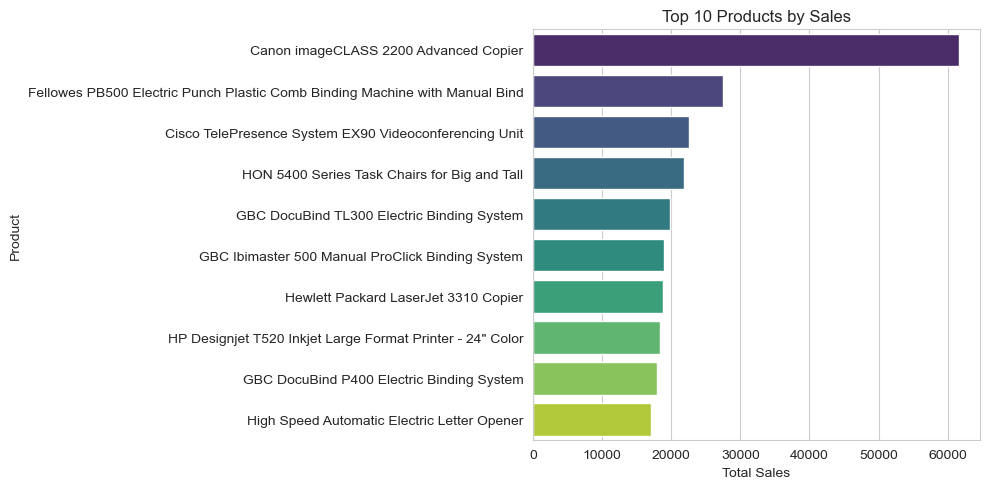

In [12]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis', hue = top_products.index, legend = False)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

Insight:
The top-selling products are Chairs, Phones, and Binders.

These products have a high volume of transactions, indicating strong customer demand.

Recommendation:
Focus marketing efforts on top performers.

2. Sales by Category

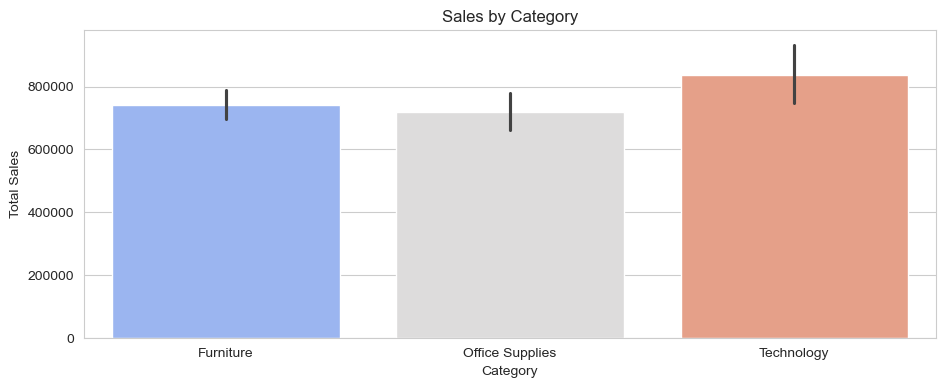

In [20]:
plt.figure(figsize=(11,4))
sns.barplot(data=df, x='Category', y='Sales', estimator=sum, palette='coolwarm', hue = 'Category' , legend = False)
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.show()

Insight:
Technology contributes the most to sales, followed by Furniture and Office Supplies.

Recommendation:
Invest more in inventory and promotions for the Technology category.

Explore upsell strategies in Furniture and Office Supplies to boost their sales contribution.

3. Profit by Region

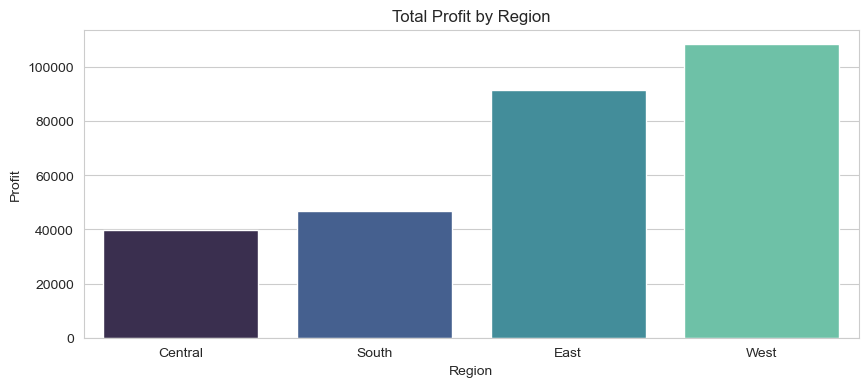

In [23]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
plt.figure(figsize=(10,4))
sns.barplot(x=region_profit.index, y=region_profit.values, palette='mako', hue = region_profit.index)
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.show()

Insight:
The West region is the most profitable, while the South lags significantly in profit despite moderate sales.

Recommendation:
Conduct a cost analysis in the South region to identify potential inefficiencies.

Focus more marketing and logistics optimization in high-profit regions like the West.

4. Monthly Sales Trend

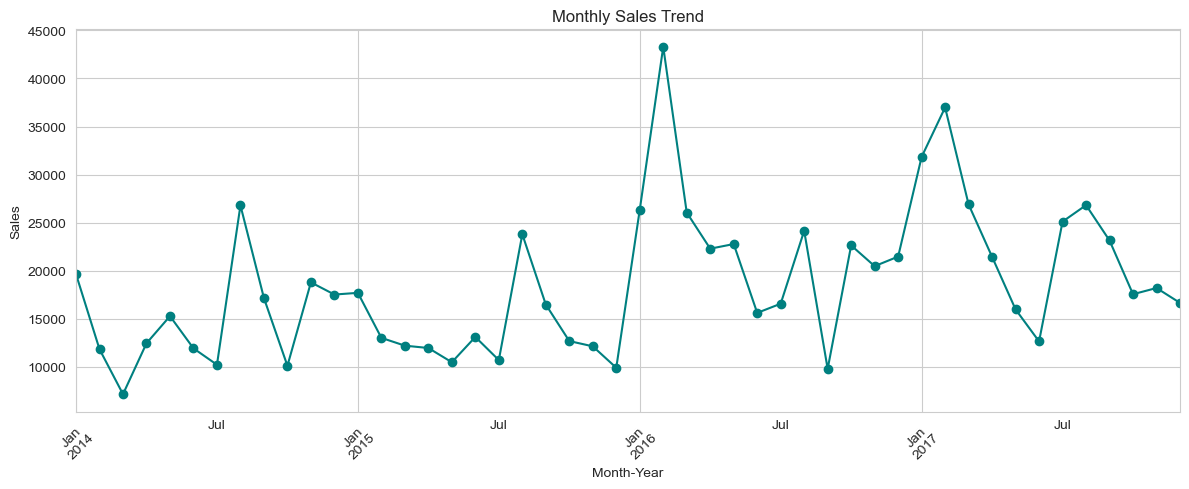

In [25]:
df['Month_Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month_Year')['Sales'].sum()
plt.figure(figsize=(12,5))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:
Sales show clear seasonal trends, with noticeable peaks during the end of the year (Nov–Dec).

Recommendation:
Prepare inventory and staffing in advance for Q4 sales spikes.

Launch major campaigns during peak sales months.

5. Profit Heatmap by Category and Region

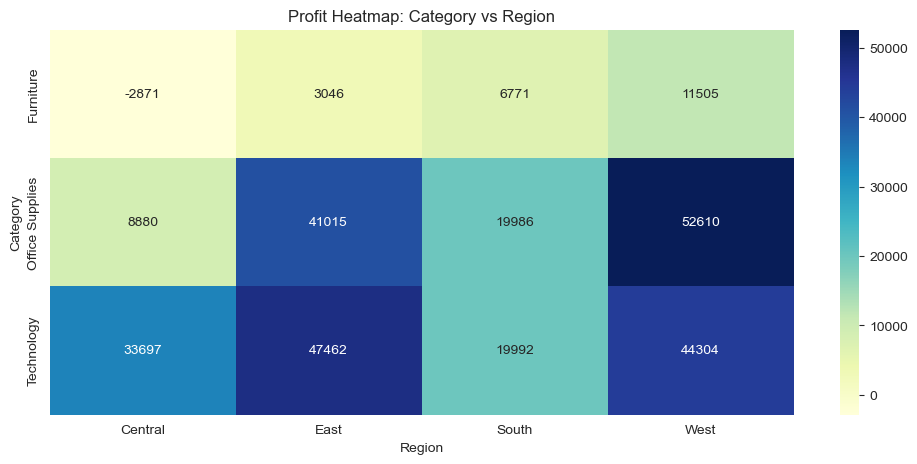

In [39]:
# Pivot table
profit_pivot = df.pivot_table(values='Profit', index='Category', columns='Region', aggfunc='sum')

plt.figure(figsize=(12,5))
sns.heatmap(profit_pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Profit Heatmap: Category vs Region")
plt.show()

Insight:
Technology in the West yields the highest profit.

Furniture in the South and East shows lower or negative profit margins.

Recommendation:
Reconsider the pricing or supplier costs in regions/categories showing negative profit.

Replicate successful strategies from Technology/West in other categories and regions.

6. Sales per Sub-Category

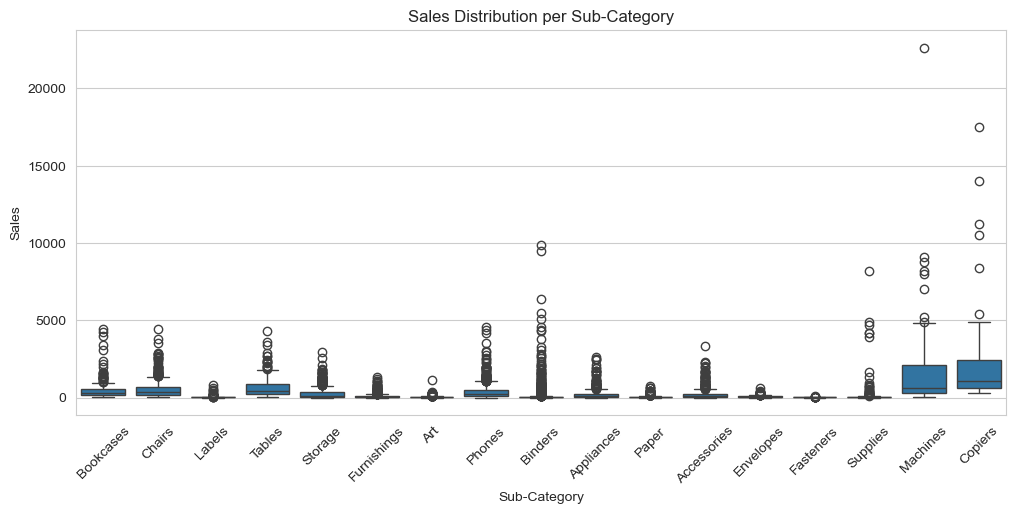

In [37]:
#Boxplot of Sales per Sub-Category
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Sub-Category', y='Sales')
plt.xticks(rotation=45)
plt.title("Sales Distribution per Sub-Category")
plt.show()

Insight:
Copiers and Phones show very high outliers in sales, indicating bulk purchases.

Most sub-categories have moderate median sales, but wide variance.

Recommendation:
Identify high-value clients purchasing bulk items and tailor offers for them.

Monitor sub-categories with wide spread to understand order behavior.

7. Count of Orders by Ship Mode

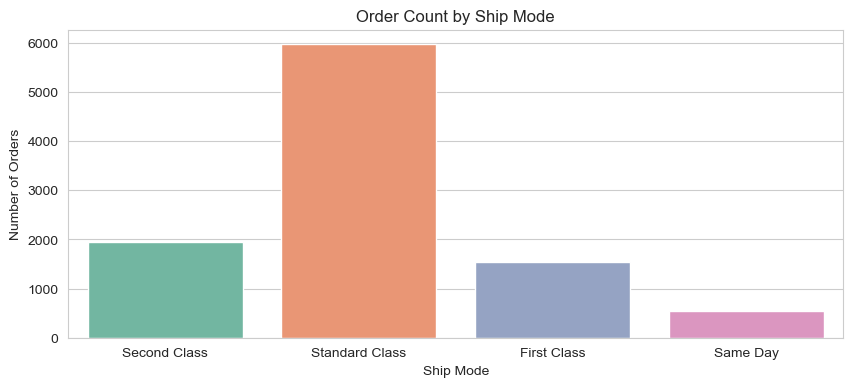

In [31]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Ship Mode', palette='Set2',hue = 'Ship Mode')
plt.title("Order Count by Ship Mode")
plt.ylabel("Number of Orders")
plt.show()

Insight:
Standard Class is the most commonly used shipping mode.

Same Day is least used, likely due to cost or availability.

Recommendation:
Promote Same Day shipping selectively for premium customers or urgent products.

Monitor customer satisfaction for Standard Class deliveries.

8. Delivery Time Analysis

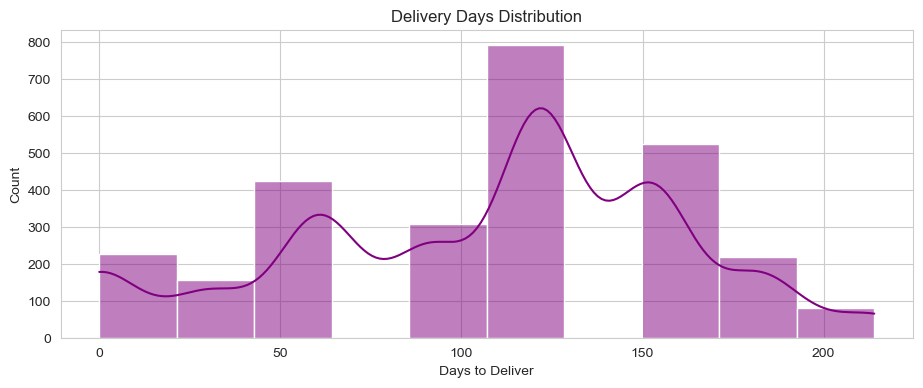

In [33]:
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

plt.figure(figsize=(11,4))
sns.histplot(df['Delivery_Days'], bins=10, kde=True, color='purple')
plt.title("Delivery Days Distribution")
plt.xlabel("Days to Deliver")
plt.show()

Insight:
Most orders are delivered within 3–5 days.

A few orders take longer than 7 days, possibly affecting satisfaction.

Recommendation:
Set realistic delivery expectations based on region/product.

Improve delivery times for late orders through better logistics.

9. Negative Profit Orders

Number of loss-making orders: 1871


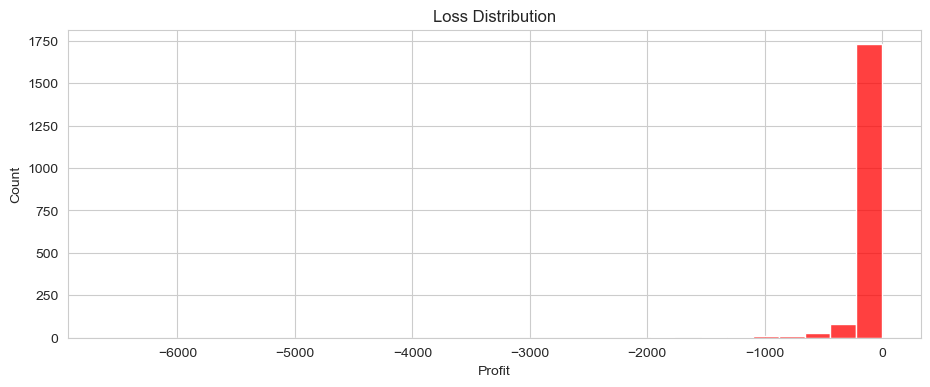

In [35]:
loss_orders = df[df['Profit'] < 0]
print(f"Number of loss-making orders: {len(loss_orders)}")

plt.figure(figsize=(11,4))
sns.histplot(loss_orders['Profit'], bins=30, color='red')
plt.title("Loss Distribution")
plt.xlabel("Profit")
plt.show()

Insight:
There are many loss-making orders, most likely due to high discounts or shipping costs.

Recommendation:
Set a minimum profit threshold for promotions.

Analyze which products or combinations cause loss and limit their discounting

10. Top 10 Cities by Sales

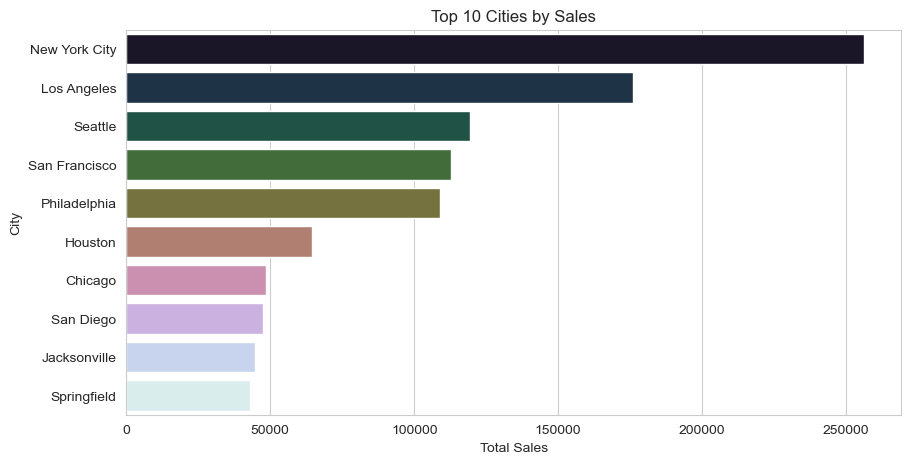

In [41]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='cubehelix',hue = top_cities.index)
plt.title("Top 10 Cities by Sales")
plt.xlabel("Total Sales")
plt.ylabel("City")
plt.show()

Insight:
New York, Los Angeles, and Seattle are the highest revenue-generating cities.

Recommendation:
Increase stock and promotions in top cities to capitalize on high demand.

Consider opening regional distribution centers near these cities to reduce delivery time.

11. Profit by Sub-Category

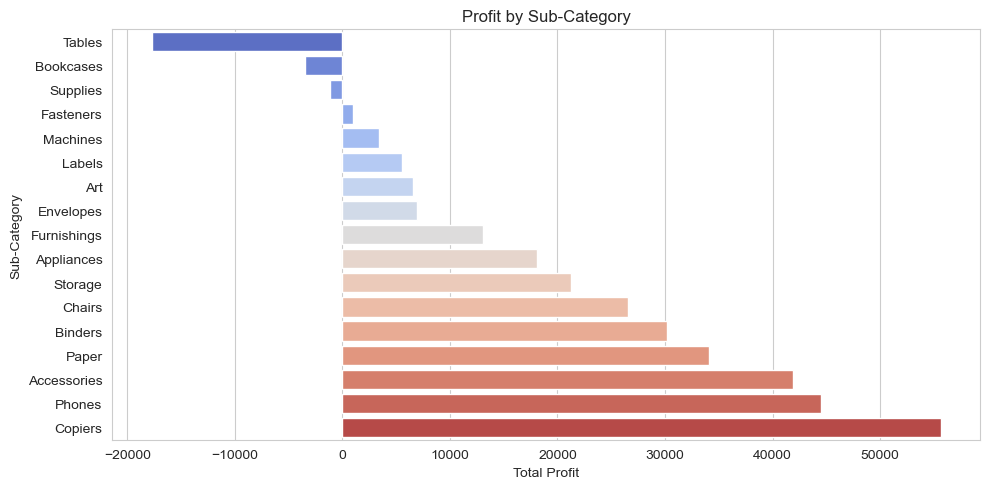

In [43]:
subcategory_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
plt.figure(figsize=(10,5))
sns.barplot(x=subcategory_profit.values, y=subcategory_profit.index, palette='coolwarm',hue = subcategory_profit.index)
plt.title('Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

Insight:
"Tables","Bookcases", and "Supplies" are consistently loss-making.

12. Discount Vs Profit By Category


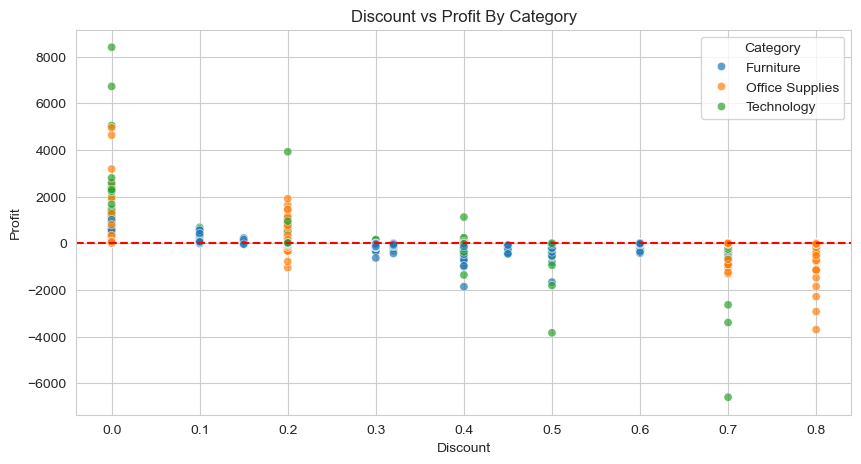

In [4]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.7)
plt.title('Discount vs Profit By Category')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Insight:
As discounts increase, profits decline.

Recomendation: 
Cap discounts at 15% for high-loss categories.

13. Segment-wise Sales & Profit

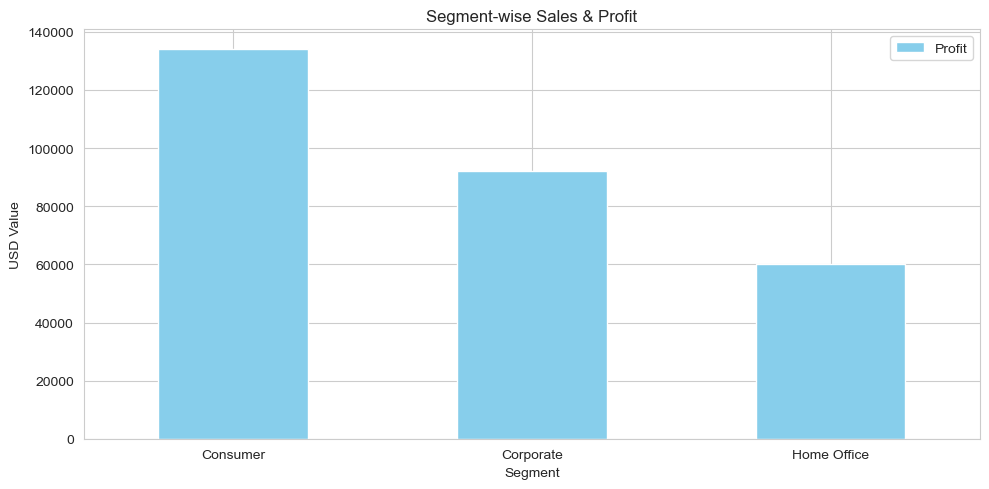

In [7]:
segment_sales = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False)
segment_sales.plot(kind='bar', figsize=(10,5), color=['skyblue', 'lightgreen'])
plt.title('Segment-wise Sales & Profit')
plt.ylabel('USD Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Insight:
Corporate segment has highest profit per order.
  
Recommendation:
Focus upsell campaigns on Corporate customers.